In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

%matplotlib inline

In [169]:
dataframe = pd.DataFrame({
        'max_force':[],
        'max_lenght':[],
        'max_time':[],
        'section_area':pd.Series([], dtype=np.dtype('int32')),
        'is_valid': pd.Series([], dtype=np.dtype('bool_')),
    })

In [170]:
whitelist = ['3-2', '3-3', '3-5', '3-9', '3-10', '4-2', '5-6', '5-7', '5-10', '6-1', '6-3', '6-8', '6-9', '7-1', '7-3', '7-7', '7-8', '7-9']

In [171]:
for file in sorted(os.listdir('Data_samples/')):

    column_names = ['time', 'force', 'lenght']

    data = pd.read_csv(f'Data_samples/{file}', sep='\t', skiprows=17, decimal=',', names = column_names)

    name = file.split('.')[0]
    section_area = int(file[0]) * 10 
    max_force = data.force.max()
    max_lenght = data.loc[data.index[data.force.idxmax()], 'lenght']
    max_time = data.loc[data.index[data.force.idxmax()], 'time']

    if name in whitelist: 
        is_valid = True
    else:
        is_valid = False

    new_value = {
        'max_force': max_force,
        'max_lenght':max_lenght,
        'max_time':max_time,
        'section_area':section_area,
        'is_valid':is_valid
    }

    dataframe.loc[f'{name}'] = new_value

dataframe.to_csv('a.csv')

In [172]:
dataframe.tail()

,max_force,max_lenght,max_time,section_area,is_valid
7-5,1792.026,2.732233,163.93,70,False
7-6,1877.844,2.973667,178.42,70,False
7-7,1821.631,2.978700,178.72,70,True
7-8,1783.597,2.732367,163.94,70,True
7-9,1818.671,2.963700,177.82,70,True


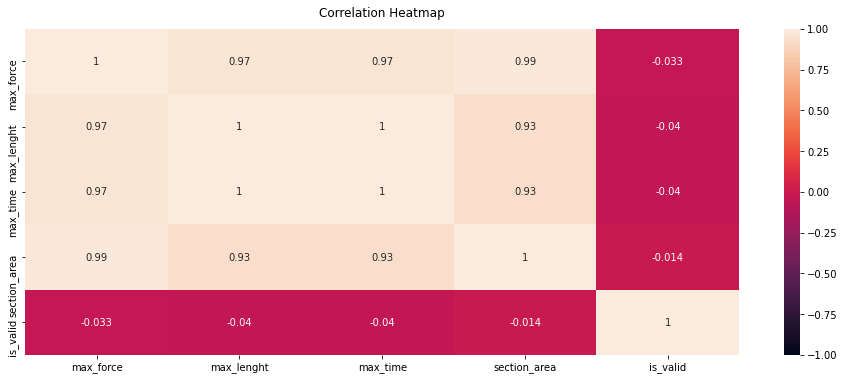

In [173]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

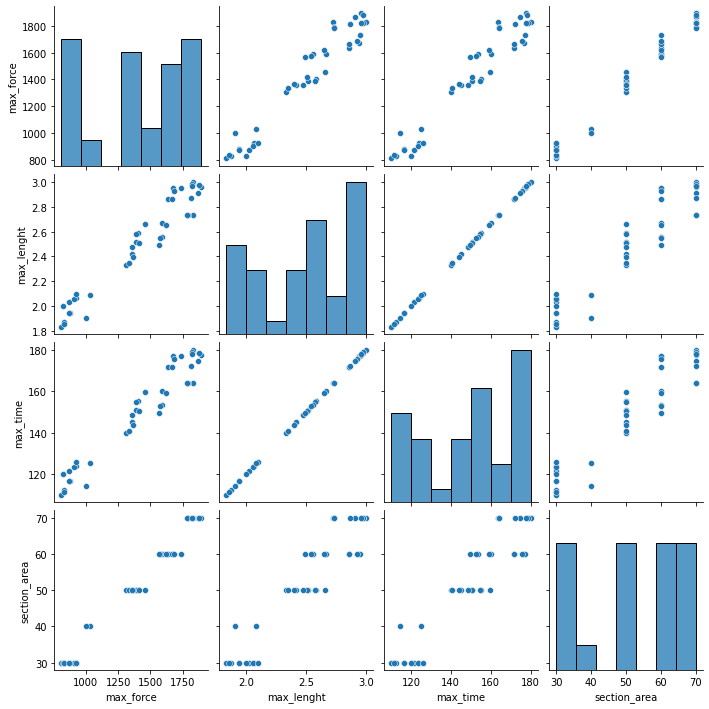

In [174]:
sns.pairplot(dataframe.drop('is_valid', axis=1))

<AxesSubplot:>

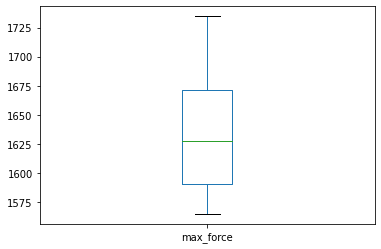

In [175]:
dataframe[dataframe.section_area == 60].max_force.plot.box()


In [176]:
import statsmodels.api as sm 

In [177]:
X = dataframe.section_area
X = sm.add_constant(X) # adding a constant
y = dataframe.max_force

In [178]:
model = sm.OLS(y, X).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_force   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2099.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           3.46e-36
Time:                        23:59:08   Log-Likelihood:                -223.88
No. Observations:                  42   AIC:                             451.8
Df Residuals:                      40   BIC:                             455.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          128.3474     29.043      4.419      0.000      69.649     187.046
section_area    24.6678      0.538     45.814      0.000      23.580      25.756
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.360
Skew:                           0.210   Prob(JB):                        0.835
Kurtosis:                       2.830   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
model.predict(X)

3-1      868.381155
3-10     868.381155
3-2      868.381155
3-3      868.381155
3-4      868.381155
3-5      868.381155
3-6      868.381155
3-7      868.381155
3-8      868.381155
3-9      868.381155
4-1     1115.059058
4-2     1115.059058
5-1     1361.736961
5-10    1361.736961
5-2     1361.736961
5-3     1361.736961
5-4     1361.736961
5-5     1361.736961
5-6     1361.736961
5-7     1361.736961
5-8     1361.736961
5-9     1361.736961
6-1     1608.414865
6-10    1608.414865
6-2     1608.414865
6-3     1608.414865
6-4     1608.414865
6-5     1608.414865
6-6     1608.414865
6-7     1608.414865
6-8     1608.414865
6-9     1608.414865
7-1     1855.092768
7-10    1855.092768
7-2     1855.092768
7-3     1855.092768
7-4     1855.092768
7-5     1855.092768
7-6     1855.092768
7-7     1855.092768
7-8     1855.092768
7-9     1855.092768
dtype: float64

<AxesSubplot:xlabel='max_force', ylabel='Count'>

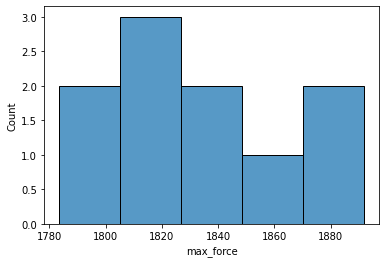

In [181]:
sns.histplot(dataframe[dataframe.section_area == 70].max_force)

In [182]:
np.ptp(dataframe[(dataframe.section_area == 70) & (dataframe.is_valid == True)].max_force)

108.23700000000008

In [183]:
np.ptp(dataframe[(dataframe.section_area == 70) & (dataframe.is_valid == False)].max_force)

85.81799999999998

<AxesSubplot:xlabel='is_valid', ylabel='max_force'>

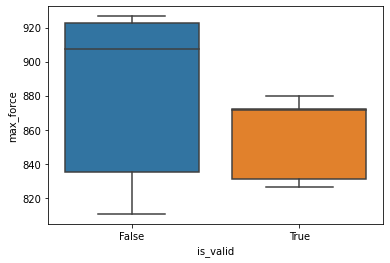

In [186]:
sns.boxplot(x="is_valid", y="max_force", data=dataframe[dataframe.section_area == 30])

In [188]:
dataframe[(dataframe.section_area == 30) & (dataframe.is_valid == True)].median()

max_force       871.825200
max_lenght        1.945533
max_time        116.730000
section_area     30.000000
is_valid          1.000000
dtype: float64

In [190]:
dataframe[(dataframe.section_area == 30) & (dataframe.is_valid == True)]

,max_force,max_lenght,max_time,section_area,is_valid
3-10,871.8252,2.029167,121.75,30,True
3-2,879.5913,1.945533,116.73,30,True
3-3,831.2734,1.874533,112.47,30,True
3-5,826.3668,1.999033,119.94,30,True
3-9,871.9587,1.943533,116.61,30,True


In [191]:
dataframe.groupby('section_area').is_valid.value_counts()

section_area  is_valid
30            False       5
              True        5
40            False       1
              True        1
50            False       7
              True        3
60            False       6
              True        4
70            False       5
              True        5
Name: is_valid, dtype: int64

In [165]:
import statsmodels.formula.api as sf

In [166]:
logit_res = sf.glm('is_valid ~ section_area + max_force', dataframe, family = sm.families.Binomial()).fit()

In [167]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['is_valid[False]', 'is_valid[True]']   No. Observations:                   32
Model:                                               GLM   Df Residuals:                       29
Model Family:                                   Binomial   Df Model:                            2
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -21.050
Date:                                   Thu, 01 Jul 2021   Deviance:                       42.101
Time:                                           23:58:58   Pearson chi2:                     31.8
No. Iterations:                                        4                                         
Covariance Type:                               nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0131      1.564     -0.648      0.517      -4.079       2.052
section_area    -0.1431      0.193     -0.740      0.459      -0.522       0.236
max_force        0.0063      0.007      0.844      0.399      -0.008       0.021
================================================================================
"""